# Introduccion a NumPy

NumPy es un paquete increíblemente poderoso en Python, agrega soporte para matrices multidimensionales y funciones matemáticas que le permiten realizar fácilmente cálculos de álgebra lineal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Arreglos basicos en NumPy

La forma más básica en que podemos usar NumPy en finanzas es calcular la rentabilidad media de una cartera. Digamos que tenemos una lista que contiene el rendimiento histórico de varias acciones

In [2]:
stock_list = [3.5, 5, 2, 8, 4.2]

Haciendo un arreglo llamando una funcion sobre la lista


In [3]:
returns = np.array(stock_list)
print returns, type(returns)

[ 3.5  5.   2.   8.   4.2] <type 'numpy.ndarray'>


In [4]:
A = np.array([[1, 2], [3, 4]])
print A, type(A)

[[1 2]
 [3 4]] <type 'numpy.ndarray'>


podemos conocer la dimension del arreglo con la funcion $shape$

In [5]:
print A.shape

(2, 2)


estos arreglos comienzan en 0 y terminan en n-1 para un arreglo de tamaño n

In [6]:
print returns[0], returns[len(returns) - 1]

3.5 4.2


In [7]:
print returns[1:3]

[ 5.  2.]


In [8]:
print A[:, 0]

[1 3]


In [9]:
print A[0, :]

[1 2]


In [10]:
print type(A[0,:])

<type 'numpy.ndarray'>


Imprimiendo la fila 0

In [11]:
print A[0]

[1 2]


Accediendo a un elemento del arreglo

In [12]:
print A[1, 1]

4


### Funciones en Arreglos


In [14]:
print np.log(returns)

[ 1.25276297  1.60943791  0.69314718  2.07944154  1.43508453]


In [15]:
print np.mean(returns)

4.54


In [16]:
print np.max(returns)

8.0


Ahora modifiquemos nuestra matriz de devoluciones con valores escalares. Si agregamos un valor escalar a una matriz, se agregará a cada elemento de la matriz. Si multiplicamos una matriz por un valor escalar, se multiplicará contra cada elemento de la matriz. Si hacemos las dos cosas, ¡ambas sucederán!

In [17]:
returns*2 + 5

array([ 12. ,  15. ,   9. ,  21. ,  13.4])

In [18]:
print "Mean: ", np.mean(returns), "Std Dev: ", np.std(returns)

Mean:  4.54 Std Dev:  1.99158228552


In [19]:
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

In [20]:
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

El módulo aleatorio en NumPy es extremadamente útil. Contiene métodos para el muestreo de muchas distribuciones de probabilidad diferentes. En este caso, sacamos N = 100N = 100 muestras aleatorias de una distribución normal con una media de 1.011.01 y una desviación estándar de 0.030.03. Tratamos estos como el rendimiento porcentual diario de nuestro activo y tomamos el producto acumulado de estas muestras para obtener el precio actual.


In [21]:
# Generate assets that are correlated with R_1
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

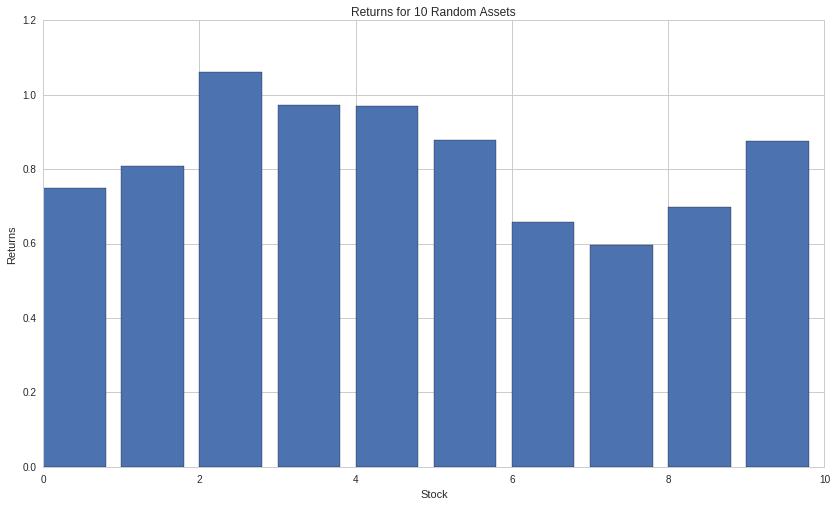

In [22]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

### Cálculo del return esperado

Ahora vamos a juntarlos en una cartera y calcular su rendimiento y riesgo esperados.

Comenzaremos generando pesos aleatorios NN para cada activo de nuestra cartera.

In [23]:
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)


Tenemos que volver a escalar los pesos para que todos sumen hasta 11. Hacemos esto escalando el vector de ponderaciones por la suma total de todos los pesos. Este paso asegura que utilizaremos 100% del efectivo de la cartera.


Para calcular la rentabilidad media de la cartera, tenemos que escalar el rendimiento de cada activo por su peso designado. Podemos extraer cada elemento de cada matriz y multiplicarlos individualmente, pero es más rápido usar los métodos de álgebra lineal de NumPy. La función que queremos es dot (). Esto calculará el producto escalar entre dos arreglos para nosotros. Entonces, si v = [1,2,3] y w = [4,5,6], entonces:

$$ v \cdot w = 1 \times 4 + 2 \times 5 + 3 \times 6 $$



Para un vector unidimensional, el producto de puntos multiplicará cada elemento de manera puntual y agregará todos los productos. En nuestro caso, tenemos un vector de pesos, $\omega = \left[ \omega_1, \omega_2, \dots \omega_N\right]$ 
y un vector de devoluciones, $\mu = \left[ \mu_1, \mu_2, \dots, \mu_N\right]$. Si tomamos el producto escalar de estos dos obtendremos:

$$ \omega \cdot \mu = \omega_1\mu_1 + \omega_2\mu_2 + \dots + \omega_N\mu_N = \mu_P $$


Esto produce la suma de todos los rendimientos de activos escalados por sus respectivos pesos. ¡Este es el rendimiento esperado general de la cartera!

In [25]:
p_returns = np.dot(weights, mean_returns)
print "Expected return of the portfolio: ", p_returns

Expected return of the portfolio:  0.832491179588


El cálculo de la rentabilidad media es bastante intuitivo y no requiere demasiada explicación del álgebra lineal. Sin embargo, calcular la varianza de nuestra cartera requiere un poco más de antecedentes.

#### Tener cuidado con los valores NaN


La mayoría de las veces, todos estos cálculos funcionarán sin problemas. Sin embargo, cuando trabajamos con datos reales, corremos el riesgo de tener valores NaN en nuestras matrices. Esta es la manera en que NumPy dice que los datos faltan o no existen. Estos valores NaN pueden llevar a errores en los cálculos matemáticos, por lo que es importante saber si su matriz contiene valores NaN y saber cómo soltarlos.

In [26]:
v = np.array([1, 2, np.nan, 4, 5])
print v

[  1.   2.  nan   4.   5.]


Veamos qué sucede cuando tratamos de tomar la media de esta matriz.

In [27]:
print np.mean(v)

nan



Claramente, los valores NaN pueden tener un gran impacto en nuestros cálculos. Afortunadamente, podemos verificar valores NaN con la función `isnan()`.

In [28]:
np.isnan(v)

array([False, False,  True, False, False], dtype=bool)

¿cómo eliminamos nans? Fácilmente, las matrices NumPy pueden indexarse por valores booleanos (verdadero o falso). Si usamos una matriz booleana para indexar una matriz, eliminaremos todos los valores de la matriz que se registre como False bajo esta condición. Usamos la función isnan() en crear una matriz booleana, asignando un valor True a todo lo que no es nan y un False a los nans y lo usamos para indexar la misma matriz.

In [29]:
ix = ~np.isnan(v) # the ~ indicates a logical not, inverting the bools
print v[ix] # We can also just write v = v[~np.isnan(v)]

[ 1.  2.  4.  5.]


In [30]:
print np.mean(v[ix])

3.0



Hay algunos accesos directos a este proceso en forma de funciones NumPy, específicamente construidas para manejarlos, como nanmean().

In [29]:
print np.nanmean(v)

3.0


### Matrix multiplication

In [31]:
A = np.array([
        [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]        
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])


La funcion `dot()` devuelve el producto de los puntos a y b. Si a y b son escalares o ambas matrices en 1-D, se devuelve un escalar; de lo contrario, se devuelve una matriz.

In [33]:
print np.dot(B, A)

[[ 34  44  54 128 124]
 [ 21  27  33  79  82]
 [ 82 101 120 227 216]
 [108 135 162 333 324]]


### Variacion de la cartera


Volvamos a nuestro ejemplo de portafolio de antes. Calculamos el rendimiento esperado de la cartera, pero ¿cómo calculamos la varianza? Comenzamos tratando de evaluar la cartera como una suma de cada activo individual, escalado por su peso.

$$ VAR[P] = VAR[\omega_1 S_1 + \omega_2 S_2 + \cdots + \omega_N S_N] $$

Cuando $S_0, \cdots, S_N$ son los activos contenidos dentro de nuestro universo Si todos nuestros activos fueran independientes entre sí, podríamos simplemente evaluar esto como

$$ VAR[P] = VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + \cdots + VAR[\omega_N S_N] = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + \cdots + \omega_N^2\sigma_N^2 $$

Sin embargo, todos nuestros activos dependen el uno del otro por su construcción. Todos están de alguna manera relacionados con nuestro activo base y, por lo tanto, entre sí. Por lo tanto, debemos calcular la varianza de la cartera al incluir las covarianzas pares individuales de cada activo. Nuestra fórmula para la varianza de la cartera:

$$ VAR[P] = \sigma_P^2 = \sum_i \omega_i^2\sigma_i^2 + \sum_i\sum_{i\neq j} \omega_i\omega_j\sigma_i\sigma_j\rho_{i, j}, \ i, j \in \lbrace 1, 2, \cdots, N \rbrace $$

Donde $\rho_{i,j}$ es la correlacion entre $S_i$ y $S_j$, $\rho_{i, j} = \frac{COV[S_i, S_j]}{\sigma_i\sigma_j}$. Esto parece extremadamente complicado, pero podemos manejar todo esto con matrices NumPy. Primero, calculamos la matriz de covarianza que relaciona todas las existencias individuales en nuestro universo.

In [34]:
cov_mat = np.cov(returns)
print cov_mat

[[ 0.00109022  0.00114256  0.00094514  0.0011421   0.00095289  0.00115191
   0.00106457  0.001005    0.00103391  0.00110032]
 [ 0.00114256  0.00168904  0.00097202  0.00124912  0.00099716  0.00115889
   0.0011055   0.00111703  0.00117003  0.00108274]
 [ 0.00094514  0.00097202  0.00119372  0.00096717  0.0007743   0.00099876
   0.00090106  0.00084709  0.0009702   0.00095025]
 [ 0.0011421   0.00124912  0.00096717  0.00159746  0.00097376  0.00119501
   0.00111565  0.00101916  0.00108031  0.00120253]
 [ 0.00095289  0.00099716  0.0007743   0.00097376  0.00123067  0.00098595
   0.00095957  0.00085405  0.00089667  0.000998  ]
 [ 0.00115191  0.00115889  0.00099876  0.00119501  0.00098595  0.00165516
   0.00111129  0.0011107   0.00110365  0.00118403]
 [ 0.00106457  0.0011055   0.00090106  0.00111565  0.00095957  0.00111129
   0.00140671  0.00101264  0.00100328  0.00107092]
 [ 0.001005    0.00111703  0.00084709  0.00101916  0.00085405  0.0011107
   0.00101264  0.00127336  0.00094386  0.00104144]
 

In [34]:
print A

[[ 1  2  3 12  6]
 [ 4  5  6 15 20]
 [ 7  8  9 10 10]]


la traspuesta de A

In [35]:
print np.transpose(A)

[[ 1  4  7]
 [ 2  5  8]
 [ 3  6  9]
 [12 15 10]
 [ 6 20 10]]


In [36]:
# Calculating the portfolio volatility
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print "Portfolio volatility: ", vol_p

Portfolio volatility:  0.0326322864656



Para confirmar este cálculo, simplemente evaluemos la volatilidad de la cartera utilizando solo funciones de NumPy.

In [37]:
# Confirming calculation
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print "Portfolio volatility: ", vol_p_alt

Portfolio volatility:  0.0326322864656


The ddof parameter is a simple integer input that tells the function the number of degrees of freedom to take into account. This is a more statistical concept, but what this tells us that our matrix calculation is correct!

